In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects

from scipy import stats

In [2]:
def get_t_score_from_p_value(p_val_ref,df):
    t_score = 1
    p_val = 2*(1 - stats.t.cdf(t_score,df=df))
    err = 0.0000001
    factor = 10

    while abs(p_val - p_val_ref) > err:
        t_score = t_score + (p_val - p_val_ref)*factor
        p_val = 2*(1 - stats.t.cdf(t_score,df=df))
        
    return t_score

# MQ2008

In [3]:
folds = ["fold1","fold2","fold3","fold4","fold5"]

measures_names = ["P@1","P@2","P@3","P@4","P@5","P@6","P@7","P@8","P@9","P@10","P_Mean",
                  "NDCG@1","NDCG@2","NDCG@3","NDCG@4","NDCG@5","NDCG@6","NDCG@7","NDCG@8","NDCG@9","NDCG@10",
                  "NDCG_Mean"]

datasets = ["train","vali","test"]

In [4]:
dataset_path = "../../MQ2008/min.txt"
with open(dataset_path) as f:
   n = sum(1 for _ in f)

n_samples_datasets = [int(0.6*n),int(0.2*n),int(0.2*n)]

### NDCG measures for the top models of our personal ListNet implementation

In [5]:
my_listnet_path = "../../MQ2008/results_summary/Results_LETOR_global_vali.csv"
my_listnet_df = pd.read_csv(my_listnet_path)

my_listnet_df = my_listnet_df.sort_values(['NDCG_Mean'],ascending=False)
my_listnet_top_model_id = my_listnet_df.index[0]

In [6]:
#TOP 5 MODELS OF OUR PERSONAL LISTNET IMPLEMENTATION
my_listnet_df.head(5)

,epochs,learning_rate,momemtum,activation,inner_act,number_layers,number_neurons,dropout,P@1,P@2,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
28,600,0.0025,0.5,linear,relu,1.0,100.0,0.65,0.50000,0.44960,...,0.48128,0.49710,0.51280,0.52386,0.52836,0.48814,0.23820,0.24182,0.440948,0.010778
24,500,0.0025,0.5,linear,relu,1.0,100.0,0.65,0.48934,0.44684,...,0.47484,0.49366,0.50820,0.52056,0.52520,0.48508,0.23612,0.24006,0.436548,0.010628
31,600,0.0025,0.5,linear,relu,2.0,100.0,0.80,0.48256,0.44128,...,0.47408,0.49100,0.50692,0.51710,0.52134,0.48150,0.23310,0.23682,0.433206,0.010670
27,500,0.0025,0.5,linear,relu,2.0,100.0,0.80,0.48086,0.43684,...,0.47028,0.48764,0.50166,0.51322,0.51774,0.47784,0.22948,0.23338,0.430202,0.010633
23,400,0.0025,0.5,linear,relu,2.0,100.0,0.80,0.47786,0.43704,...,0.46684,0.48602,0.50032,0.51190,0.51654,0.47744,0.23146,0.23494,0.429128,0.010375


In [7]:
my_listnet_df.iloc[0]["P_Mean"]

0.356508

In [9]:
columns = ["Fold" if x == 0 else my_listnet_df.columns[x-1] for x in range(len(my_listnet_df.columns)+1)]
best_df = pd.DataFrame(columns = columns)
index = 0
for fold in ["fold1","fold2","fold3","fold4","fold5","global"]:
    my_path = "../../MQ2008/results_summary/Results_LETOR_"+fold+"_test.csv"
    temp_df = pd.read_csv(my_path)
    best_df.loc[index,0:1] = fold
    best_df.loc[index,1:] = (temp_df.loc[my_listnet_top_model_id])
    index += 1

In [10]:
best_df

,Fold,epochs,learning_rate,momemtum,activation,inner_act,number_layers,number_neurons,dropout,P@1,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
0,fold1,600,0.0025,0.5,linear,relu,1,100,0.65,0.4167,...,0.4046,0.428,0.4563,0.4701,0.4774,0.425,0.2127,0.2155,0.38225,0.00843856
1,fold2,600,0.0025,0.5,linear,relu,1,100,0.65,0.3694,...,0.3772,0.3952,0.4143,0.4311,0.4377,0.4202,0.1649,0.1658,0.34587,0.0096109
2,fold3,600,0.0025,0.5,linear,relu,1,100,0.65,0.4204,...,0.3836,0.4185,0.4449,0.4584,0.4586,0.442,0.2388,0.2424,0.38127,0.00613328
3,fold4,600,0.0025,0.5,linear,relu,1,100,0.65,0.5159,...,0.4728,0.5008,0.512,0.5224,0.5326,0.4844,0.2813,0.287,0.44553,0.00757785
4,fold5,600,0.0025,0.5,linear,relu,1,100,0.65,0.4395,...,0.4498,0.4813,0.5076,0.5179,0.5333,0.4941,0.212,0.2172,0.42142,0.0126584
5,global,600,0.0025,0.5,linear,relu,1,100,0.65,0.43238,...,0.4176,0.44476,0.46702,0.47998,0.48792,0.45314,0.22194,0.22558,0.395268,0.00870683


### NDCG measures for the ListNet baselines of MQ2008

In [12]:
baseline_path = "../../MQ2008/results_summary/Results_baseline_vali.csv"
baseline_df = pd.read_csv(baseline_path)

In [13]:
baseline_df

,Folds,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
0,Fold1,0.4968,0.4618,0.4098,0.3806,0.3478,0.3206,0.2985,0.2779,0.2604,...,0.4831,0.5093,0.5228,0.5363,0.5465,0.5073,0.2153,0.2222,0.44313,0.013811
1,Fold2,0.4423,0.4071,0.4038,0.3830,0.3538,0.3152,0.2921,0.2740,0.2557,...,0.4315,0.4544,0.4683,0.4753,0.4892,0.4371,0.2173,0.2195,0.39549,0.009019
2,Fold3,0.4140,0.3471,0.3439,0.3264,0.3096,0.2930,0.2712,0.2532,0.2350,...,0.3766,0.4001,0.4191,0.4337,0.4364,0.4229,0.1597,0.1630,0.34765,0.009952
3,Fold4,0.4204,0.4013,0.3439,0.3328,0.3159,0.2983,0.2803,0.2643,0.2456,...,0.4101,0.4389,0.4557,0.4693,0.4753,0.4603,0.2496,0.2553,0.39995,0.006292
4,Fold5,0.5223,0.5127,0.4671,0.4347,0.3987,0.3800,0.3558,0.3336,0.3142,...,0.4997,0.5254,0.5353,0.5462,0.5498,0.5027,0.2930,0.2969,0.46805,0.008488
5,average,0.4592,0.4260,0.3937,0.3715,0.3452,0.3214,0.2996,0.2806,0.2622,...,0.4402,0.4656,0.4802,0.4922,0.4994,0.4661,0.2270,0.2314,0.41086,0.009283


In [14]:
baseline_df.iloc[5]["P_Mean"]

0.34062

### Comparison NDCG measures between top model of personal ListNet and the Baseline

In [16]:
my_listnet_mean = [[] for x in range(len(datasets))]
my_listnet_var = [[] for x in range(len(datasets))]

baseline_mean = [[] for x in range(len(datasets))]
baseline_var = [[] for x in range(len(datasets))]

for idx_dataset in range(len(datasets)):
    my_listnet_list_NDCG = [[] for x in range(len(measures_names))]
    baseline_list_NDCG = [[] for x in range(len(measures_names))]
    
    baseline_path = "../../MQ2008/results_summary/Results_baseline_"+datasets[idx_dataset]+".csv"
    
    baseline_df = pd.read_csv(baseline_path)
    
    for idx_fold in range(len(folds)):
        
        my_listnet_path = "../../MQ2008/results_summary/Results_LETOR_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"

        my_listnet_df = pd.read_csv(my_listnet_path)
        
        for idx_metric in range(len(measures_names)):
            my_listnet_list_NDCG[idx_metric].append(my_listnet_df.iloc[my_listnet_top_model_id][measures_names[idx_metric]])
            baseline_list_NDCG[idx_metric].append(baseline_df.iloc[idx_fold][measures_names[idx_metric]])
            
    my_listnet_mean[idx_dataset] = np.array(my_listnet_list_NDCG).mean(axis=1)
    my_listnet_var[idx_dataset] = np.array(my_listnet_list_NDCG).var(axis=1)
    
    baseline_mean[idx_dataset] = np.array(baseline_list_NDCG).mean(axis=1)
    baseline_var[idx_dataset] = np.array(baseline_list_NDCG).var(axis=1)

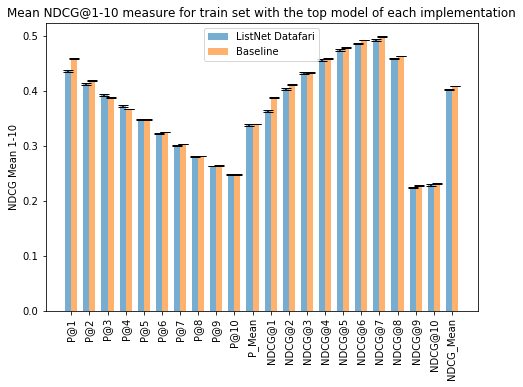

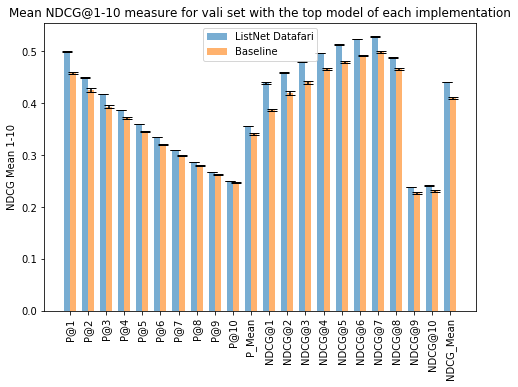

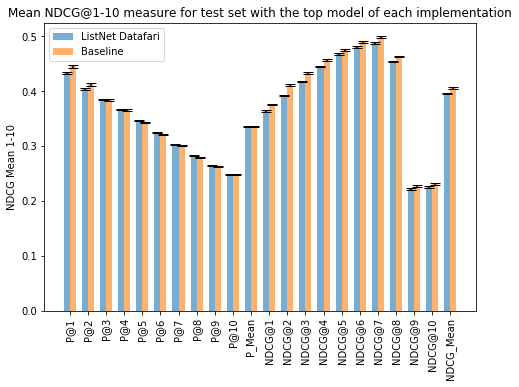

In [17]:
indices = range(len(measures_names))
width = np.min(np.diff(indices))/3.

for idx_dataset in range(len(datasets)):
    ax = plt.figure().add_axes([0,0,1,1])
    plt.xticks(rotation=90)
    ax.bar(indices-width/2, my_listnet_mean[idx_dataset],width, yerr = my_listnet_var[idx_dataset],\
           align='center', alpha=0.6, ecolor='black', capsize=5, label = "ListNet Datafari")
    ax.bar(indices+width/2, baseline_mean[idx_dataset],width, yerr = baseline_var[idx_dataset],\
           align='center', alpha=0.6, ecolor='black', capsize=5, label = "Baseline")
    ax.set_title("Mean NDCG@1-10 measure for "+datasets[idx_dataset]+" set with the top model of each implementation")
    ax.set_xticks(indices)
    ax.axes.set_xticklabels(measures_names)
    ax.set_ylabel("NDCG Mean 1-10")
    ax.legend(loc='best')

### Comparing NDCG of the top model of each library with Wilcoxon's signed-rank test

We will now compare the results by the two bests models of our libraries with the Wilcoxon's signed-rank test
- We take the best model of each library
- We study how they perform on each folder
- We will compare their NDCG values and use them for the Wilcoxon's signed-rank test

In [18]:
measures_names = ["P@1","P@2","P@3","P@4","P@5","P@6","P@7","P@8","P@9","P@10","P_Mean",
                  "NDCG@1","NDCG@2","NDCG@3","NDCG@4","NDCG@5","NDCG@6","NDCG@7","NDCG@8","NDCG@9","NDCG@10",
                  "NDCG_Mean"]

w_score = [[] for x in range(len(datasets))]
p_value = [[] for x in range(len(datasets))]

sig_lvl = 0.05

In [19]:
n = len(folds)

for idx_dataset in range(len(datasets)):
    diff = [[] for x in range(len(measures_names))]
    
    baseline_path = "../../MQ2008/results_summary/Results_baseline_"+datasets[idx_dataset]+".csv"
    
    baseline_df = pd.read_csv(baseline_path)
    
    for idx_fold in range(len(folds)):
        
        my_listnet_path = "../../MQ2008/results_summary/Results_LETOR_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"

        my_listnet_df = pd.read_csv(my_listnet_path)
        
        for idx_metric in range(len(measures_names)):
            my_listnet_NDCG = my_listnet_df.iloc[my_listnet_top_model_id][measures_names[idx_metric]]
            baseline_NDCG = baseline_df.iloc[idx_fold][measures_names[idx_metric]]
            diff[idx_metric].append(my_listnet_NDCG - baseline_NDCG)
            
    for idx_metric in range(len(measures_names)):        
        w,p= stats.wilcoxon(diff[idx_metric])
        w_score[idx_dataset].append(w)
        p_value[idx_dataset].append(p)

/usr/local/lib/python3.5/dist-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


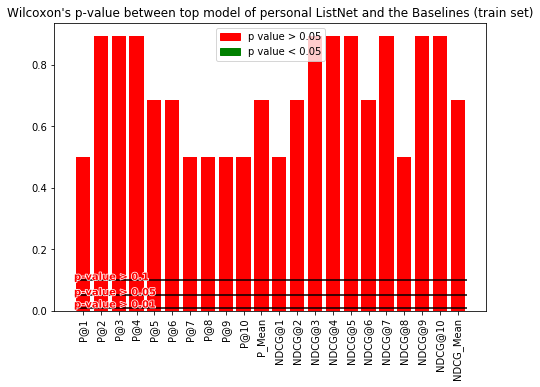

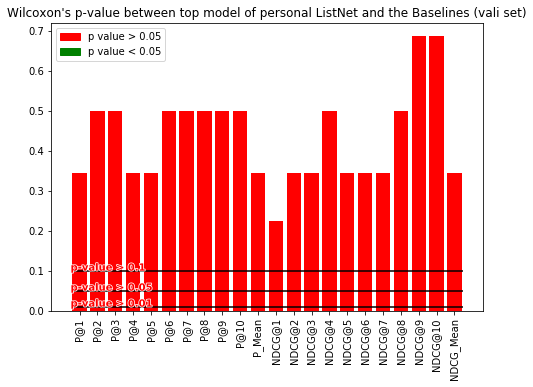

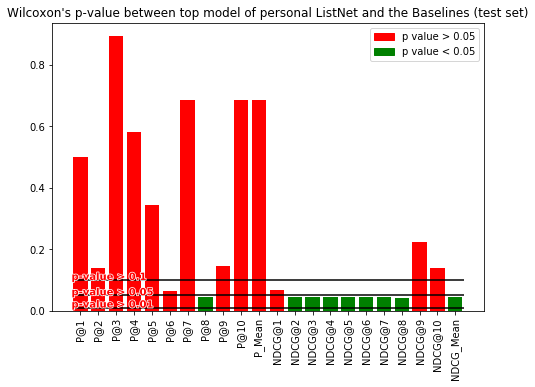

In [20]:
red_patch = mpatches.Patch(color='red', label='p value > '+str(sig_lvl))
green_patch = mpatches.Patch(color='green', label='p value < '+str(sig_lvl))
for idx_dataset in range(len(datasets)):
    colors = []
    for idx_metric in range(len(measures_names)):
        if p_value[idx_dataset][idx_metric] < sig_lvl:
            colors.append("green")
        else:
            colors.append("red")

    ax = plt.figure().add_axes([0,0,1,1])
    plt.xticks(rotation=90)
    ax.bar(measures_names,p_value[idx_dataset],color=colors)
    ax.set_title("Wilcoxon's p-value between top model of personal ListNet and the Baselines ("+datasets[idx_dataset]+" set)")
    ax.legend(handles=[red_patch,green_patch])
    if any(p > 0.1 for p in p_value[idx_dataset]):
        ax.hlines(0.1,-0.5,len(measures_names)-0.5, label="p_value > 0.1")
        txt = ax.text(-0.5, 0.1, s="p-value > 0.1", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])
    if any(p > 0.05 for p in p_value[idx_dataset]):
        ax.hlines(0.05,-0.5,len(measures_names)-0.5, label="p_value > 0.05")
        txt=ax.text(-0.5, 0.05, s="p-value > 0.05", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])
    if any(p > 0.01 for p in p_value[idx_dataset]):
        ax.hlines(0.01,-0.5,len(measures_names)-0.5, label="p_value > 0.01")
        txt=ax.text(-0.5, 0.01, s="p-value > 0.01", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])

In [21]:
w_score_df = pd.DataFrame(w_score, columns = measures_names, index=datasets)
w_score_df.style.set_caption("W score")

,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,P@10,P_Mean,NDCG@1,NDCG@2,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean
train,5,7,7,7,6,6,5,5,5,5,6,5,6,7,7,7,6,7,5,7,7,6
vali,4,5,5,4,4,5,5,5,5,5,4,3,4,4,5,4,4,4,5,6,6,4
test,5,2,7,3.5,4,0,6,0,1,6,6,0,0,0,0,0,0,0,0,3,2,0


In [22]:
p_value_df = pd.DataFrame(p_value, columns = measures_names, index=datasets)
p_value_df.style.set_caption("P-value score")

,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,P@10,P_Mean,NDCG@1,NDCG@2,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean
train,0.500184,0.892738,0.892738,0.892738,0.68583,0.68583,0.500184,0.500184,0.500184,0.500184,0.68583,0.500184,0.68583,0.892738,0.892738,0.892738,0.68583,0.892738,0.500184,0.892738,0.892738,0.68583
vali,0.345231,0.500184,0.500184,0.345231,0.345231,0.500184,0.500184,0.500184,0.500184,0.500184,0.345231,0.224916,0.345231,0.345231,0.500184,0.345231,0.345231,0.345231,0.500184,0.68583,0.68583,0.345231
test,0.500184,0.138011,0.892738,0.580712,0.345231,0.0655997,0.68583,0.0431144,0.144127,0.68583,0.68583,0.0678892,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0431144,0.0421682,0.224916,0.138011,0.0431144


As we can see, it is difficult to establish if a model is better than the other.

# MQ2007

In [23]:
folds = ["fold1","fold2","fold3","fold4","fold5"]

measures_names = ["P@1","P@2","P@3","P@4","P@5","P@6","P@7","P@8","P@9","P@10","P_Mean",
                  "NDCG@1","NDCG@2","NDCG@3","NDCG@4","NDCG@5","NDCG@6","NDCG@7","NDCG@8","NDCG@9","NDCG@10",
                  "NDCG_Mean"]

datasets = ["train","vali","test"]

In [24]:
dataset_path = "../../MQ2007/min.txt"
with open(dataset_path) as f:
   n = sum(1 for _ in f)

n_samples_datasets = [int(0.6*n),int(0.2*n),int(0.2*n)]

### NDCG measures for the top models of our personal ListNet implementation

In [25]:
my_listnet_path = "../../MQ2007/results_summary/Results_LETOR_global_vali.csv"
my_listnet_df = pd.read_csv(my_listnet_path)

my_listnet_df = my_listnet_df.sort_values(['NDCG_Mean'],ascending=False)
my_listnet_top_model_id = my_listnet_df.index[0]

In [26]:
#TOP 5 MODELS OF OUR PERSONAL LISTNET IMPLEMENTATION
my_listnet_df.head(5)

,epochs,learning_rate,momemtum,activation,inner_act,number_layers,number_neurons,dropout,P@1,P@2,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
28,600,0.0025,0.5,linear,relu,1.0,100.0,0.65,0.48170,0.46416,...,0.42696,0.43254,0.43758,0.44402,0.44842,0.45414,0.45856,0.46358,0.440786,0.000214
24,500,0.0025,0.5,linear,relu,1.0,100.0,0.65,0.47636,0.46208,...,0.42340,0.42814,0.43314,0.43840,0.44384,0.44916,0.45376,0.45900,0.436204,0.000208
30,600,0.0025,0.5,linear,relu,2.0,100.0,0.65,0.47734,0.46052,...,0.42262,0.42822,0.43324,0.43834,0.44328,0.44856,0.45334,0.45890,0.435820,0.000211
26,500,0.0025,0.5,linear,relu,2.0,100.0,0.65,0.47320,0.45716,...,0.42044,0.42528,0.43004,0.43478,0.43972,0.44456,0.44960,0.45504,0.432546,0.000198
20,400,0.0025,0.5,linear,relu,1.0,100.0,0.65,0.47952,0.45854,...,0.41716,0.42350,0.42870,0.43358,0.43860,0.44442,0.44964,0.45524,0.432252,0.000188


In [27]:
my_listnet_df.iloc[0]["P_Mean"]

0.430972

In [28]:
columns = ["Fold" if x == 0 else my_listnet_df.columns[x-1] for x in range(len(my_listnet_df.columns)+1)]
best_df = pd.DataFrame(columns = columns)
index = 0
for fold in ["fold1","fold2","fold3","fold4","fold5","global"]:
    my_path = "../../MQ2007/results_summary/Results_LETOR_"+fold+"_test.csv"
    temp_df = pd.read_csv(my_path)
    best_df.loc[index,0:1] = fold
    best_df.loc[index,1:] = (temp_df.loc[my_listnet_top_model_id])
    index += 1

In [29]:
best_df

,Fold,epochs,learning_rate,momemtum,activation,inner_act,number_layers,number_neurons,dropout,P@1,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
0,fold1,600,0.0025,0.5,linear,relu,1,100,0.65,0.5,...,0.4393,0.4422,0.4495,0.4562,0.4641,0.4686,0.4711,0.475,0.45425,0.000196063
1,fold2,600,0.0025,0.5,linear,relu,1,100,0.65,0.469,...,0.3841,0.3944,0.3969,0.4054,0.4063,0.4149,0.42,0.4264,0.40171,0.000234021
2,fold3,600,0.0025,0.5,linear,relu,1,100,0.65,0.472,...,0.4164,0.4237,0.4325,0.437,0.4358,0.4394,0.4447,0.4506,0.43033,0.000174016
3,fold4,600,0.0025,0.5,linear,relu,1,100,0.65,0.4454,...,0.3689,0.3797,0.3815,0.3917,0.397,0.4041,0.4112,0.4163,0.38748,0.000349828
4,fold5,600,0.0025,0.5,linear,relu,1,100,0.65,0.4661,...,0.4195,0.4247,0.4254,0.4313,0.4332,0.4382,0.4445,0.4511,0.42857,0.000183138
5,global,600,0.0025,0.5,linear,relu,1,100,0.65,0.4705,...,0.40564,0.41294,0.41716,0.42432,0.42728,0.43304,0.4383,0.44388,0.420468,0.000213833


### NDCG measures for the ListNet baselines of MQ2007

In [30]:
baseline_path = "../../MQ2007/results_summary/Results_baseline_vali.csv"
baseline_df = pd.read_csv(baseline_path)

In [31]:
baseline_df

,Folds,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,...,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean,NDCG_Var
0,Fold1,0.4749,0.4646,0.4484,0.4270,0.4124,0.4036,0.3953,0.3872,0.3818,...,0.4273,0.4276,0.4271,0.4326,0.4379,0.4431,0.4482,0.4550,0.43351,0.000141
1,Fold2,0.4851,0.4777,0.4633,0.4509,0.4381,0.4330,0.4226,0.4141,0.4067,...,0.4474,0.4492,0.4531,0.4627,0.4680,0.4720,0.4753,0.4804,0.45875,0.000207
2,Fold3,0.4720,0.4528,0.4376,0.4292,0.4165,0.4090,0.4029,0.3986,0.3933,...,0.3961,0.3985,0.4024,0.4069,0.4131,0.4176,0.4231,0.4284,0.40654,0.000175
3,Fold4,0.4985,0.4617,0.4376,0.4189,0.4136,0.4007,0.3881,0.3824,0.3746,...,0.4227,0.4242,0.4319,0.4359,0.4348,0.4406,0.4440,0.4497,0.43425,0.000074
4,Fold5,0.4543,0.4277,0.4041,0.4004,0.3935,0.3815,0.3793,0.3709,0.3687,...,0.3677,0.3778,0.3865,0.3900,0.4001,0.4050,0.4133,0.4204,0.39024,0.000319
5,average,0.4770,0.4569,0.4382,0.4253,0.4148,0.4056,0.3976,0.3906,0.3850,...,0.4122,0.4155,0.4202,0.4256,0.4308,0.4357,0.4408,0.4468,0.42467,0.000164


In [32]:
baseline_df.iloc[5]["P_Mean"]

0.4171300000000001

### Comparison NDCG measures between top model of personal ListNet and the Baseline

In [33]:
my_listnet_mean = [[] for x in range(len(datasets))]
my_listnet_var = [[] for x in range(len(datasets))]

baseline_mean = [[] for x in range(len(datasets))]
baseline_var = [[] for x in range(len(datasets))]

for idx_dataset in range(len(datasets)):
    my_listnet_list_NDCG = [[] for x in range(len(measures_names))]
    baseline_list_NDCG = [[] for x in range(len(measures_names))]
    
    baseline_path = "../../MQ2007/results_summary/Results_baseline_"+datasets[idx_dataset]+".csv"
    
    baseline_df = pd.read_csv(baseline_path)
    
    for idx_fold in range(len(folds)):
        
        my_listnet_path = "../../MQ2007/results_summary/Results_LETOR_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"

        my_listnet_df = pd.read_csv(my_listnet_path)
        
        for idx_metric in range(len(measures_names)):
            my_listnet_list_NDCG[idx_metric].append(my_listnet_df.iloc[my_listnet_top_model_id][measures_names[idx_metric]])
            baseline_list_NDCG[idx_metric].append(baseline_df.iloc[idx_fold][measures_names[idx_metric]])
            
    my_listnet_mean[idx_dataset] = np.array(my_listnet_list_NDCG).mean(axis=1)
    my_listnet_var[idx_dataset] = np.array(my_listnet_list_NDCG).var(axis=1)
    
    baseline_mean[idx_dataset] = np.array(baseline_list_NDCG).mean(axis=1)
    baseline_var[idx_dataset] = np.array(baseline_list_NDCG).var(axis=1)

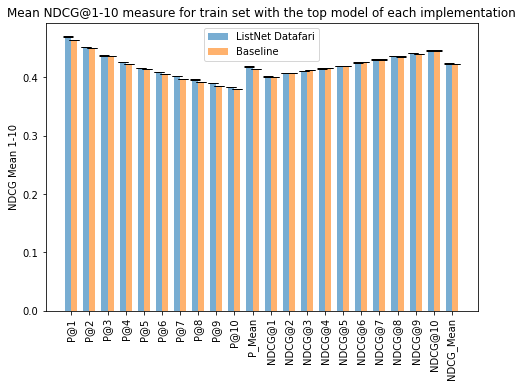

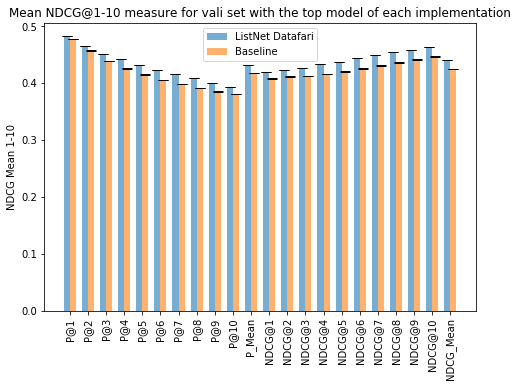

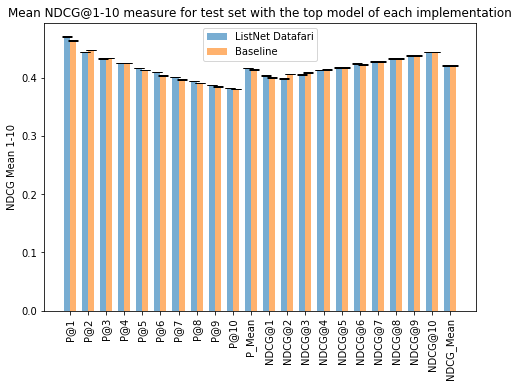

In [34]:
indices = range(len(measures_names))
width = np.min(np.diff(indices))/3.

for idx_dataset in range(len(datasets)):
    ax = plt.figure().add_axes([0,0,1,1])
    plt.xticks(rotation=90)
    ax.bar(indices-width/2, my_listnet_mean[idx_dataset],width, yerr = my_listnet_var[idx_dataset],\
           align='center', alpha=0.6, ecolor='black', capsize=5, label = "ListNet Datafari")
    ax.bar(indices+width/2, baseline_mean[idx_dataset],width, yerr = baseline_var[idx_dataset],\
           align='center', alpha=0.6, ecolor='black', capsize=5, label = "Baseline")
    ax.set_title("Mean NDCG@1-10 measure for "+datasets[idx_dataset]+" set with the top model of each implementation")
    ax.set_xticks(indices)
    ax.axes.set_xticklabels(measures_names)
    ax.set_ylabel("NDCG Mean 1-10")
    ax.legend(loc='best')

### Comparing NDCG of the top model of each library with Wilcoxon's signed-rank test

We will now compare the results by the two bests models of our libraries with the Wilcoxon's signed-rank test
- We take the best model of each library
- We study how they perform on each folder
- We will compare their NDCG values and use them for the Wilcoxon's signed-rank test

In [35]:
measures_names = ["P@1","P@2","P@3","P@4","P@5","P@6","P@7","P@8","P@9","P@10","P_Mean",
                  "NDCG@1","NDCG@2","NDCG@3","NDCG@4","NDCG@5","NDCG@6","NDCG@7","NDCG@8","NDCG@9","NDCG@10",
                  "NDCG_Mean"]

w_score = [[] for x in range(len(datasets))]
p_value = [[] for x in range(len(datasets))]

sig_lvl = 0.05

In [36]:
n = len(folds)

for idx_dataset in range(len(datasets)):
    diff = [[] for x in range(len(measures_names))]
    
    baseline_path = "../../MQ2007/results_summary/Results_baseline_"+datasets[idx_dataset]+".csv"
    
    baseline_df = pd.read_csv(baseline_path)
    
    for idx_fold in range(len(folds)):
        
        my_listnet_path = "../../MQ2007/results_summary/Results_LETOR_"+folds[idx_fold]+\
            "_"+datasets[idx_dataset]+".csv"

        my_listnet_df = pd.read_csv(my_listnet_path)
        
        for idx_metric in range(len(measures_names)):
            my_listnet_NDCG = my_listnet_df.iloc[my_listnet_top_model_id][measures_names[idx_metric]]
            baseline_NDCG = baseline_df.iloc[idx_fold][measures_names[idx_metric]]
            diff[idx_metric].append(my_listnet_NDCG - baseline_NDCG)
            
    for idx_metric in range(len(measures_names)):        
        w,p= stats.wilcoxon(diff[idx_metric])
        w_score[idx_dataset].append(w)
        p_value[idx_dataset].append(p)

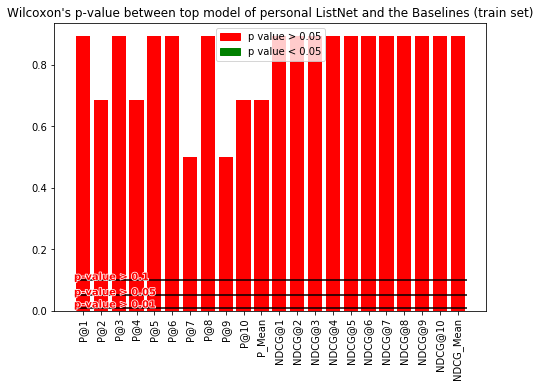

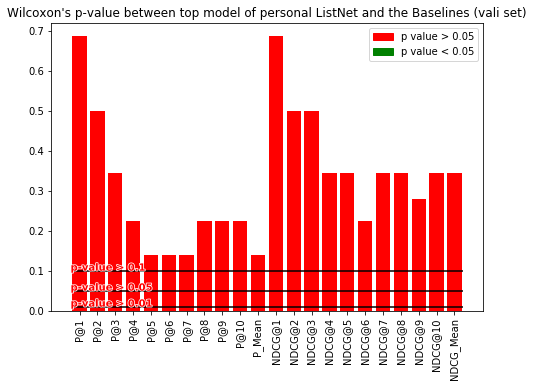

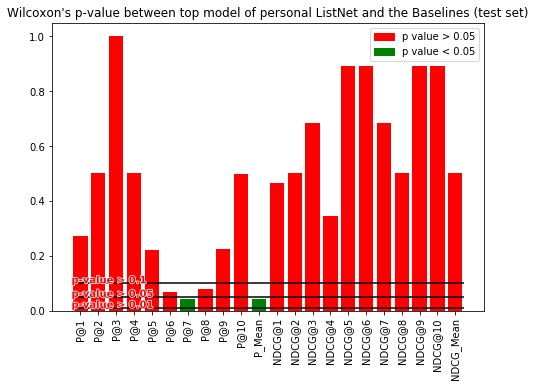

In [37]:
red_patch = mpatches.Patch(color='red', label='p value > '+str(sig_lvl))
green_patch = mpatches.Patch(color='green', label='p value < '+str(sig_lvl))
for idx_dataset in range(len(datasets)):
    colors = []
    for idx_metric in range(len(measures_names)):
        if p_value[idx_dataset][idx_metric] < sig_lvl:
            colors.append("green")
        else:
            colors.append("red")

    ax = plt.figure().add_axes([0,0,1,1])
    plt.xticks(rotation=90)
    ax.bar(measures_names,p_value[idx_dataset],color=colors)
    ax.set_title("Wilcoxon's p-value between top model of personal ListNet and the Baselines ("+datasets[idx_dataset]+" set)")
    ax.legend(handles=[red_patch,green_patch])
    if any(p > 0.1 for p in p_value[idx_dataset]):
        ax.hlines(0.1,-0.5,len(measures_names)-0.5, label="p_value > 0.1")
        txt = ax.text(-0.5, 0.1, s="p-value > 0.1", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])
    if any(p > 0.05 for p in p_value[idx_dataset]):
        ax.hlines(0.05,-0.5,len(measures_names)-0.5, label="p_value > 0.05")
        txt=ax.text(-0.5, 0.05, s="p-value > 0.05", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])
    if any(p > 0.01 for p in p_value[idx_dataset]):
        ax.hlines(0.01,-0.5,len(measures_names)-0.5, label="p_value > 0.01")
        txt=ax.text(-0.5, 0.01, s="p-value > 0.01", color="red", weight = "bold")
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='white')])

In [38]:
w_score_df = pd.DataFrame(w_score, columns = measures_names, index=datasets)
w_score_df.style.set_caption("W score")

,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,P@10,P_Mean,NDCG@1,NDCG@2,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean
train,7,6,7,6,7,7,5,7,5,6,6,7,7,7,7,7,7,7,7,7,7,7
vali,6,5,4,3,2,2,2,3,3,3,2,6,5,5,4,4,3,4,4,3.5,4,4
test,2,5,5,5,3,0,0,1,3,5,0,3,5,6,4,7,7,6,5,7,7,5


In [39]:
p_value_df = pd.DataFrame(p_value, columns = measures_names, index=datasets)
p_value_df.style.set_caption("P-value score")

,P@1,P@2,P@3,P@4,P@5,P@6,P@7,P@8,P@9,P@10,P_Mean,NDCG@1,NDCG@2,NDCG@3,NDCG@4,NDCG@5,NDCG@6,NDCG@7,NDCG@8,NDCG@9,NDCG@10,NDCG_Mean
train,0.892738,0.68583,0.892738,0.68583,0.892738,0.892738,0.500184,0.892738,0.500184,0.68583,0.68583,0.892738,0.892738,0.892738,0.892738,0.892738,0.892738,0.892738,0.892738,0.892738,0.892738,0.892738
vali,0.68583,0.500184,0.345231,0.224916,0.138011,0.138011,0.138011,0.224916,0.224916,0.224916,0.138011,0.68583,0.500184,0.500184,0.345231,0.345231,0.224916,0.345231,0.345231,0.278517,0.345231,0.345231
test,0.273322,0.500184,1,0.500184,0.222801,0.0678892,0.0431144,0.0796158,0.224916,0.498225,0.0431144,0.465209,0.500184,0.68583,0.345231,0.892738,0.892738,0.68583,0.500184,0.892738,0.892738,0.500184
